We now investigate the behavior of the Falkner-Skan equation in the presence of an adverse pressure gradient $-1 < m < 0$. This regime is more interesting than the favorable gradient case, featuring non-uniqueness of solutions and a critical limit beyond which no solutions exist. In the range $m_c < m < 0$ (where $m_c$ is to be determined) we find two branches of exponentially converging solutions, one of which is the continuation of that already found for $m > 0$.

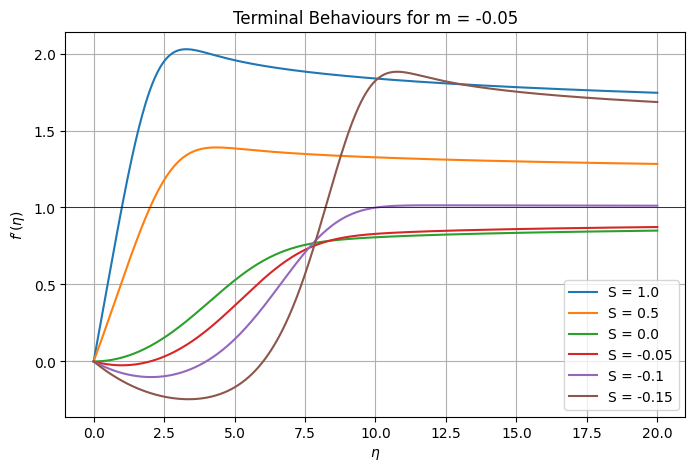

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def solve_fs(m, S, eta_max=10):
    def ode(eta, y):
        f, fp, fpp = y
        return [fp, fpp, -0.5*(m+1)*f*fpp - m*(1 - fp**2)]

    res = solve_ivp(ode, [0, eta_max], [0, 0, S], dense_output=True, rtol=1e-9, atol=1e-9, method="BDF")
    return res

m_test = -0.05
S_values = [1.0, 0.5, 0.0, -0.05, -0.1, -0.15]

plt.figure(figsize=(8, 5))
eta_plot = np.linspace(0, 20, 500)

for S in S_values:
    sol = solve_fs(m_test, S, eta_max=20)
    y = sol.sol(eta_plot)
    f_prime = y[1]
    plt.plot(eta_plot, f_prime, label=f"S = {S}")

plt.axhline(1, color='k', linewidth=0.5)
plt.title(f"Terminal Behaviours for m = {m_test}")
plt.xlabel(r"$\eta$")
plt.ylabel(r"$f'(\eta)$")
plt.legend()
plt.grid(True)
plt.show()

In [3]:
from scipy.optimize import brentq

def find_m_for_S(S, m_guess_min=-0.2, m_guess_max=0.1):
    '''
    Finds m for a given S such that f'(inf) -> 1.
    '''
    def objective(m_val):
        sol = solve_fs(m_val, S, eta_max=10)
        return sol.y[1, -1] - 1.0

    try:
        m_root = brentq(objective, m_guess_min, m_guess_max, xtol=1e-5)
        return m_root
    except ValueError:
        return None

S_scan = np.linspace(0.6, -0.15, 50)
m_results = []
S_results = []

for S in S_scan:
    m_val = find_m_for_S(S)
    if m_val is not None:
        m_results.append(m_val)
        S_results.append(S)

m_arr = np.array(m_results)
S_arr = np.array(S_results)

# Identify mc
mc_index = np.argmin(m_arr)
mc = m_arr[mc_index]
Sc = S_arr[mc_index]

print(f"Calculated critical value mc: {mc:.5f}")
print(f"Value of S at critical point: {Sc:.5f}")

# High S (start) corresponds to the upper Branch.
# Low S (end) corresponds to the lower Branch.
upper_branch_mask = np.arange(len(S_arr)) <= mc_index
lower_branch_mask = np.arange(len(S_arr)) >= mc_index

m_upper = m_arr[upper_branch_mask]
S_upper = S_arr[upper_branch_mask]

m_lower = m_arr[lower_branch_mask]
S_lower = S_arr[lower_branch_mask]

Calculated critical value mc: -0.09042
Value of S at critical point: 0.00306


For $m_c < m < 0$, the solution typically approaches a constant other than $1$. Only at the precise eigenvalues $S_u$ and $S_l$ do we observe the solution converging exponentially to $1$. Above $S_u$, we see convergence above $1$; between $S_u$ and $S_l$, we see convergence below $1$ and below $S_l$, it converges above $1$ again.

The branch at $S_u$ represents a standard attached boundary layer subjected to an adverse pressure gradient since $m < 0$.

*   As $m$ becomes more negative, the adverse pressure gradient strengthens, decelerating the flow. This is evidenced by the decrease in $S_m$ as $m$ decreases.
*   At $m = m_c$, the shear stress is low but still positive. The separation $S=0$ occurs on the lower branch, though physically we often associate $m_c$ with the onset of separation phenomena.

The branch at $S_l$ represents a solution with reverse flow near the wall.
*   Here, $f'(0) = 0$ but $f''(0) < 0$ which causes $f'(\eta)$ to immediately become negative, indicating the fluid near the wall is moving upstream, against the main flow direction.
*   This a separated flow region or a "backflow" solution. The fluid moves backwards near the wall but eventually recovers to matching the forward free-stream velocity $f' \to 1$ further out.

As we follow the lower branch from $m_c$ back towards $m = 0$, the starting shear stress $S$ becomes more negative and the region of reverse flow grows larger and extends further from the wall. As $m \to 0^-$, the interface between the reverse flow and the forward flow moves towards infinity. The solution breaks down as a boundary layer, transitioning into a free shear layer (mixing layer) between a stagnant fluid and a moving stream, separated by an infinite distance.

In the interval $-1 < m < m_c$, there are other branches of exponentially converging solutions.

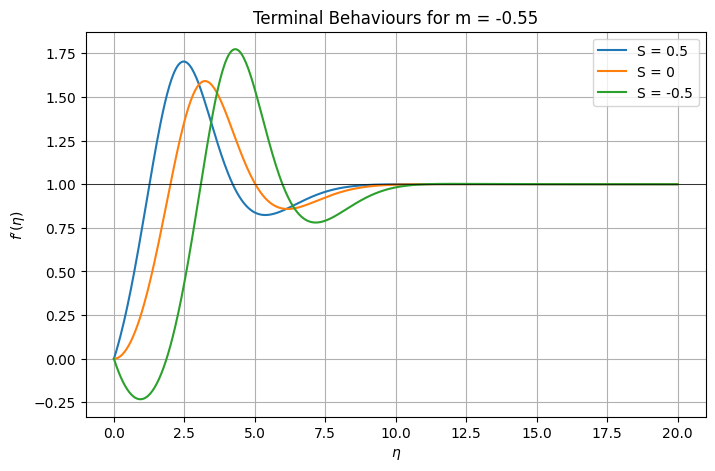

In [40]:
m_test = -0.55
S_values = [0.5, 0, -0.5]

plt.figure(figsize=(8, 5))
eta_plot = np.linspace(0, 20, 500)

for S in S_values:
    sol = solve_fs(m_test, S, eta_max=20)
    y = sol.sol(eta_plot)
    f_prime = y[1]
    plt.plot(eta_plot, f_prime, label=f"S = {S}")

plt.axhline(1, color='k', linewidth=0.5)
plt.title(f"Terminal Behaviours for m = {m_test}")
plt.xlabel(r"$\eta$")
plt.ylabel(r"$f'(\eta)$")
plt.legend()
plt.grid(True)
plt.show()

The existence of these branches confirms that for adverse pressure gradients $m < 0$, the Falkner-Skan equation admits multiple solutions. The standard boundary layer solution (monotonic approach to $f'=1$) ceases to exist below $m_c$, but oscillatory solutions persist.

The two new branches exhibit velocity overshooting, i.e., $f' > 1$. Physically, this means the fluid inside the boundary layer is moving faster than the external potential flow. This is not typical for a standard boundary layer due to an adverse pressure gradient which usually slows fluid down. These profiles resemble wall jets, where a high-momentum fluid sheet is injected along the boundary.

These generally unstable solutions so they are unlikely to be observed in a natural, steady laminar flow over a passive surface.

As $m \to -1$, these solutions correspond to flow into a corner or a sink. The presence of multiple solutions highlights the complexity of such flows, where the fluid can accelerate into the sink in various modes, though usually only the solution with the lowest energy (closest to monotonic) is physically realised.

Reducing to the autonomous case $m = -1$, we have
\begin{equation}
    f''' - (1 - (f')^2) = 0 \quad \implies \quad f''' = 1 - (f')^2
\end{equation}
The boundary conditions at the wall are $f(0) = f'(0) = 0$. The far-field condition depends on the sign of $A$, where $f'(\eta) \to \pm 1$ as $\eta \to \infty$, depending on whether $A > 0$ (source) or $A < 0$ (sink).

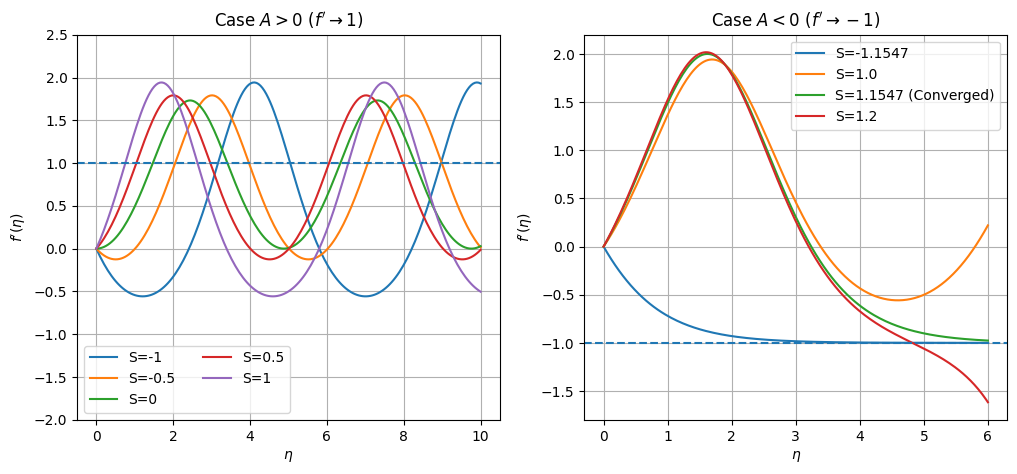

In [65]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def solve_m_minus_1(S, eta_max=10):
    '''
    Integrates the Falkner-Skan equation for m = -1.
    '''
    def ode(eta, y):
        f, fp, fpp = y
        fppp = 1 - fp**2
        return [fp, fpp, fppp]

    sol = solve_ivp(ode, [0, eta_max], [0, 0, S],
                    dense_output=True, rtol=1e-9, atol=1e-9)
    return sol

S_values_pos = [-1, -0.5, 0, 0.5, 1]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for S in S_values_pos:
    sol = solve_m_minus_1(S, eta_max=10)
    eta = np.linspace(0, sol.sol.t_max, 200)
    fp = sol.sol(eta)[1]
    plt.plot(eta, fp, label=f'S={S}')

plt.axhline(1, linestyle='--')
plt.title(f"Case $A > 0$ ($f' \\to 1$)")
plt.xlabel(r'$\eta$')
plt.ylabel(r"$f'(\eta)$")
plt.ylim(-2, 2.5)
plt.legend(ncol=2)
plt.grid(True)

S_sink_guess = 1.1547
S_values_neg = [-S_sink_guess,1.0, S_sink_guess, 1.2]

plt.subplot(1, 2, 2)
for S in S_values_neg:
    sol = solve_m_minus_1(S, eta_max=6)
    eta = np.linspace(0, sol.sol.t_max, 200)
    fp = sol.sol(eta)[1]

    if abs(S - S_sink_guess) < 0.01:
        plt.plot(eta, fp, label=f'S={S:.4f} (Converged)')
    else:
        plt.plot(eta, fp, label=f'S={S}')

plt.axhline(-1, linestyle='--')
plt.title(f"Case $A < 0$ ($f' \\to -1$)")
plt.xlabel(r'$\eta$')
plt.ylabel(r"$f'(\eta)$")
plt.legend()
plt.grid(True)

plt.show()

For a line source $A > 0$, no value of $S$ leads to a solution that converges to $f' = 1$. If we pick $S$ such that $f'$ grows towards 1, it invariably passes $1$, causing the term $f''' = (1 - f'^2)$ to become negative. Then $f''$ starts to decrease.

We conclude that there are no solutions to the boundary layer equations for flow generated by a line source. Physically, this suggests that the boundary layer assumptions break down, or that a steady attached laminar boundary layer cannot be sustained against the strong adverse pressure gradient of a line source.

For a line sink $A < 0$, we see that there is a specific value of $S$ for which the solution smoothly converges to $f' = -1$. Thus, a solution does exist. This corresponds to flow into a line sink (converging flow). The flow accelerates towards the sink, which constitutes a favorable pressure gradient, allowing the boundary layer to remain attached.

We can prove these conclusions analytically. Let $g = f'$. The equation for $m=-1$ is:
\begin{equation}
    f''' = 1 - (f')^2 \quad \implies \quad g'' = 1 - g^2.
\end{equation}
Multiply by $g'$ and integrate with respect to $\eta$ to obtain
\begin{equation}
    g' g'' = (1 - g^2) g' \implies \frac{1}{2}(g')^2 = g - \frac{1}{3}g^3 + C.
\end{equation}
We have no slip condition at the wall $g(0) = f'(0) = 0$. Let $S = f''(0) = g'(0)$. Substituting these into the integral yields
\begin{equation}
    \frac{1}{2}S^2 = 0 - 0 + C \implies C = \frac{1}{2}S^2.
\end{equation}
For convergence, we also require the condition at infinity, $g'(\infty) \to 0$.

For $A > 0$, we substitute $g=1$ and $g'=0$ into the energy equation, giving the condition
\begin{equation}
    C = -\frac{2}{3}.
\end{equation}
This implies that $S^2 = -4/3$ which has no real solutions.

For $A < 0$, similarly substitute $g=-1$ and $g'=0$ to get the condition
\begin{equation}
    C = \frac{2}{3}.
\end{equation}
This requires $S^2 = 4/3$ which certainly has a positive solution.